In [1]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
import glob
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------
import admin_functions as adfn
import criticality as crfn
import IS as isfn
import trace_analyse as tfn

# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
F10t2 = '/Volumes/Dominic 10tb2/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

In [2]:
experiment = 'BLNLIGHTPTZ-FOXG1'
savepath = Fdata + experiment + os.sep 
os.chdir(Fdata +  experiment)
binlist = sorted(glob.glob('*_regbinarised*'))
coordlist =  sorted(glob.glob('*labcoord*'))
coordlist, binlist

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'B

In [3]:
dim = [.8, .8, 15] 

#NNB
for i in range(len(coordlist)):
    name = coordlist[i][:coordlist[i].find('run')+7]
    trace = np.load(binlist[i])
    coord = np.load(coordlist[i])
    sub_trace, sub_coord = adfn.select_region(trace, coord, 'Telencephalon')
    
    sub_trace = sub_trace[:,:9828]
    
    data = np.multiply(sub_coord[:,:3].astype(float), dim)   
    nnb = crfn.neighbour(data, 10)
    np.save(savepath + name + 'nnb_10-Tel.npy', nnb)
    print(str(i) + 'of ' + str(len(coordlist)))

0of 35
1of 35
2of 35
3of 35
4of 35
5of 35
6of 35
7of 35
8of 35
9of 35
10of 35
11of 35
12of 35
13of 35
14of 35
15of 35
16of 35
17of 35
18of 35
19of 35
20of 35
21of 35
22of 35
23of 35
24of 35
25of 35
26of 35
27of 35
28of 35
29of 35
30of 35
31of 35
32of 35
33of 35
34of 35


In [4]:
experiment = 'BLNLIGHTPTZ-FOXG1'
savepath = Fdata + experiment + os.sep 
os.chdir(Fdata +  experiment)
binlist = sorted(glob.glob('*_regbinarised*'))
nnblist =  sorted(glob.glob('*nnb*10*Tel*'))
nnblist, binlist

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_nnb_10-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_nnb_10-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_nnb_10-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_nnb_10-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_nnb_10-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_nnb_10-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_nnb_10-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_nnb_10-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_nnb_10-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_nnb_10-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_nnb_10-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_nnb_10-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_ru

In [5]:
#Avalanches
for i in range(len(nnblist)):
    name = nnblist[i][:nnblist[i].find('run')+7]
    
    trace = np.load(binlist[i])
    coord = np.load(coordlist[i])
    sub_trace, sub_coord = adfn.select_region(trace, coord, 'Telencephalon')
    
    sub_trace = sub_trace[:,:9828]
    
    av, pkg = crfn.avalanche(np.load(nnblist[i]), sub_trace)
    np.save(savepath + name + 'av-Tel.npy', av)
    np.save(savepath + name + 'pkg-Tel.npy', pkg)
    print(name)
    print(np.max(av[0]))
    print(np.max(av[1])/2.73)
    print(str(i) + 'of ' + str(len(nnblist)))
    

BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_
1040
23.80952380952381
0of 35
BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_
6215
94.87179487179488
1of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
369
19.78021978021978
2of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_
1253
27.472527472527474
3of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
930
29.67032967032967
4of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_
2007
31.86813186813187
5of 35
BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
43050
234.06593406593407
6of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_
6542
130.76923076923077
7of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_
29387
368.13186813186815
8of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
1094
58.24175824175824
9of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_
816
28.571428571428573
10of 35
BLNLIGHTP

In [63]:
# BLN Avalanche distributions

# Visualise 
#---------------------------------------------------------------------------
av_list = sorted(glob.glob('**_av-*npy*')) 
av_list

['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6d

In [65]:
#EXPONENT
#Calculate exponents

for i in range(len(av_list)):
    curr_av = np.load(av_list[i])
    exp = crfn.power_exponent(curr_av, 2000)
    name = av_list[i][:av_list[i].find('run')+7]
    
    np.save(savepath + name + 'exp-Tel.npy', exp)

    print(name)
    print(str(i) + 'of ' + str(len(av_list)))
    

BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_
0of 35
BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_
1of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
2of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_
3of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
4of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_
5of 35
BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
6of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_
7of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_
8of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
9of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_
10of 35
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
11of 35
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_
12of 35
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
13of 35
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_
14of

In [147]:
# BLN Avalanche distributions

# Visualise 
#---------------------------------------------------------------------------
wt_list = sorted(glob.glob('*++*PTZ02_*exp-*.npy*')) 
het_list = sorted(glob.glob('*+--*PTZ02_*exp-*.npy*')) 
hom_list = sorted(glob.glob('*---*PTZ02_*exp-*.npy*')) 

wt_list, het_list, hom_list

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--05_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--06_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--07_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--08_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--09_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy',
  'BLNLIGHTPTZ-FOXG1---03_2photon_se

In [153]:
l_list = wt_list, het_list, hom_list
wt, het, hom = [],[],[]
choose = 0
for i in range(len(l_list)):
    print(i)
    for e in range(len(l_list[i])):
        if i == 0:
            wt = np.append(wt, np.load(l_list[i][e])[choose])
        if i == 1:
            het = np.append(het, np.load(l_list[i][e])[choose])
            
        if i == 2:
            hom = np.append(hom, np.load(l_list[i][e])[choose])

0
1
2


In [132]:
data[0][0]

2.0161310305075486

In [154]:
point = np.zeros((17))

p_spike_df = {}
count=0
choose = 0

data = [wt, het, hom]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = data[e][i]
        count+=1

p_spike_df = pd.DataFrame({"data":point , "Labels":  np.append(adfn.repeat_list('WT',4),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

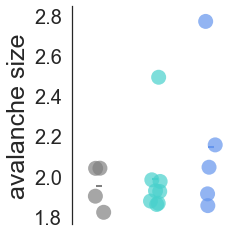

In [155]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (3,4))
ax = sns.pointplot(x="Labels", y="data", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=p_spike_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.7)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('avalanche size', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
#plt.ylim(top = 2000, bottom = 0)

plt.savefig(Ffig + 'avsize_exp_ptz.svg', transparent = True)
plt.show()

In [121]:
from scipy import stats
data = wt
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

2.4264755101625637 0.07917176854787765


In [122]:
from scipy import stats
data = het
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)


2.4856069765594784 0.11116600547151397


In [123]:
from scipy import stats
data = hom
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)


2.7967118322609372 0.2895103142299513


In [97]:
#Space
alpha = 0.05

t, p = stats.ttest_ind(wt, hom)
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -1.1033453023776383   p = 0.3063574503876628
Samples are the same


In [124]:
#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(wt, het)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(wt, hom)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 15.0   p = 0.46616218667416665
U = 5.0   p = 0.13517207032739004


In [66]:
#LLR

for i in range(len(av_list)):
    curr_av = np.load(av_list[i])
    LLR = crfn.LLR(curr_av, 2000)
    name = av_list[i][:av_list[i].find('run')+7]
    
    np.save(savepath + name + 'LLR-Tel.npy', LLR)

    print(name)
    print(str(i) + 'of ' + str(len(av_list)))
    

BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_
0of 35
BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_
1of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
2of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_
3of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
4of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_
5of 35
BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
6of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_
7of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_
8of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
9of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_
10of 35
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
11of 35
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_
12of 35
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
13of 35
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_
14of

In [ ]:
#LLR

In [360]:
# BLN Avalanche distributions

# Visualise 
#---------------------------------------------------------------------------
blnlist = sorted(glob.glob('*++*BLNLIGHT_*_av-*.npy*')) 
p5list = sorted(glob.glob('*+--*BLNLIGHT_*_av-*.npy*')) 
p20list = sorted(glob.glob('*---*BLNLIGHT_*_av-*.npy*')) 

blnlist, p5list, p20list

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--05_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--06_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--07_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--08_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--09_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Teltemp.npy'],
 ['BLN

In [ ]:
colors2 = ['grey','mediumturquoise','cornflowerblue']


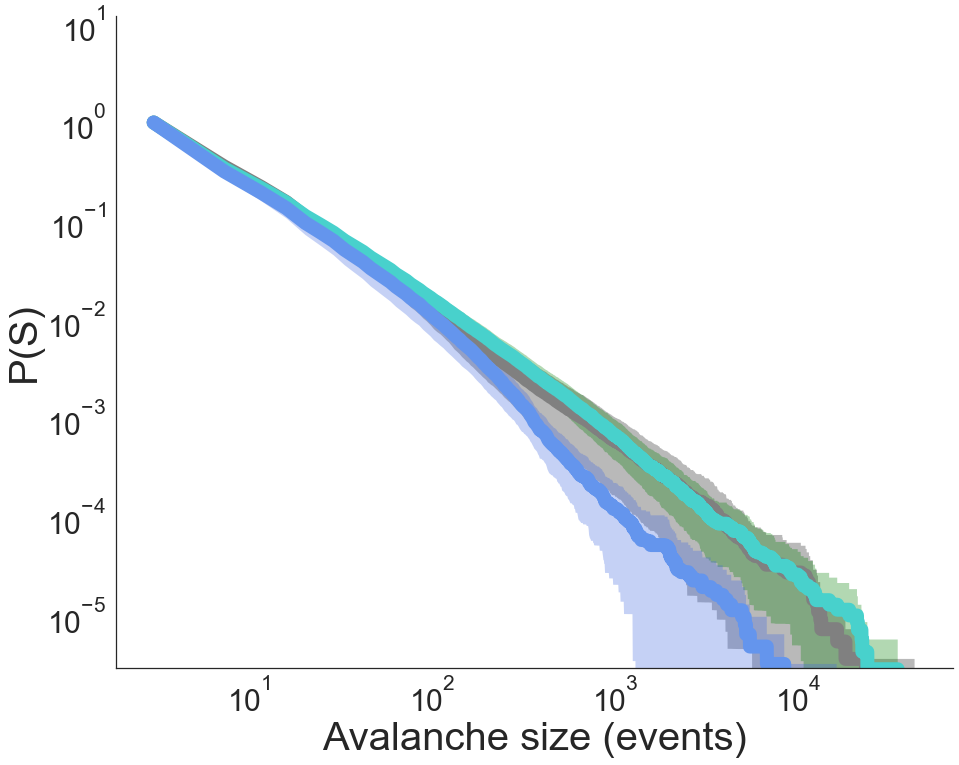

In [359]:
from scipy import stats
import matplotlib

fig, axarr = plt.subplots(figsize = (15,12))  

stop = 300000
xaxis = np.mean(bln_histlist, axis= 0)
sem = stats.sem(bln_histlist)
minus = (xaxis-(sem))[:stop]
#minus [minus < 0.00001] = 0
plus = (xaxis+(sem))[:stop]
plt.fill_between(yaxis[:stop], minus, plus,facecolor='k',alpha=0.3,linewidth = 0)
hist = plt.plot(yaxis, xaxis, c = 'grey', linewidth = 14)

stop = 300000
xaxis = np.mean(p5_histlist, axis= 0)
sem = stats.sem(p5_histlist)
minus = (xaxis-(sem))[:stop]
#minus [minus < 0.00001] = 0.
plus = (xaxis+(sem))[:stop]
plt.fill_between(yaxis[:stop], minus, plus,facecolor='green',alpha=0.3,linewidth = 0)
hist = plt.plot(yaxis, xaxis, c = 'mediumturquoise', linewidth = 14, linestyle= '-')

stop = 300000
xaxis = np.mean(p20_histlist, axis= 0)
sem = stats.sem(p20_histlist)
minus = (xaxis-(sem))[:stop]
#minus [minus < 0.00001] = 0
plus = (xaxis+(sem))[:stop]
plt.fill_between(yaxis[:stop], minus, plus, facecolor='royalblue',alpha=0.3,linewidth = 0)
hist = plt.plot(yaxis, xaxis, c = 'cornflowerblue', linewidth = 14, linestyle = '-')


axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
#plt.xlim(right = 400)  
plt.ylim(bottom = 0.000003)  
axarr.set_ylabel('P(S)', size = '40')
axarr.set_xlabel('Avalanche size (events)', size = '40')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 30)
plt.xticks(size = 30)
plt.savefig(Ffig + 'avsize_foxg1_spont_mean.svg', transparent = True)
plt.show()

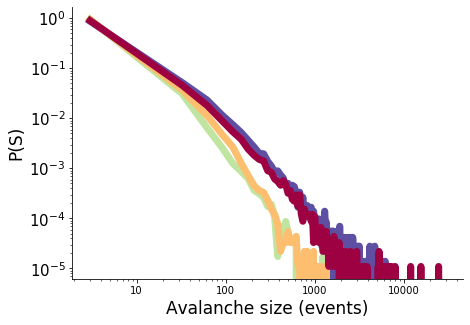

In [4]:
import seaborn as sns
from matplotlib import cm 

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

binchoose = 1000
choose = wt_list
#labels = ['10$^1$','10$^1$','10$^1$','10$^2$','10$^3$']
colors  = cm.Spectral_r(np.linspace(0,1,len(choose)))


#colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
colors  = cm.Spectral_r(np.linspace(0,1,len(choose)))
binvec = []
for i in range(len(choose)):
    binvec = np.append(binvec, np.load(choose[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)

for i in range(len(choose)):
    avdistcut = np.load(choose[i])[0]
    binned=np.linspace(mini,maxi, binchoose)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 7, markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.ylim(bottom = 0.00001)  
#plt.xlim(right = 1000)  
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#axarr.set_xticklabels(labels, size = 15)
plt.yticks(size = 15)

#plt.savefig(Ffig + 'av_size.svg', transparent = True)
plt.show()

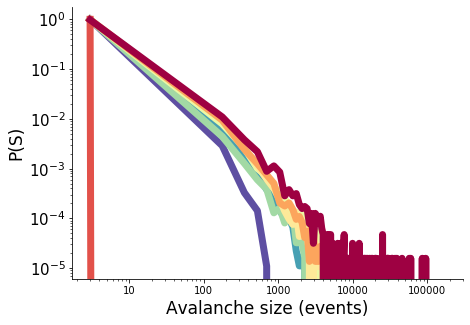

In [5]:
import seaborn as sns
from matplotlib import cm 

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

binchoose = 1000
choose = het_list
#labels = ['10$^1$','10$^1$','10$^1$','10$^2$','10$^3$']
colors  = cm.Spectral_r(np.linspace(0,1,len(choose)))


#colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
colors  = cm.Spectral_r(np.linspace(0,1,len(choose)))
binvec = []
for i in range(len(choose)):
    binvec = np.append(binvec, np.load(choose[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)

for i in range(len(choose)):
    avdistcut = np.load(choose[i])[0]
    binned=np.linspace(mini,maxi, binchoose)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 7, markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.ylim(bottom = 0.00001)  
#plt.xlim(right = 1000)  
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#axarr.set_xticklabels(labels, size = 15)
plt.yticks(size = 15)

#plt.savefig(Ffig + 'av_size.svg', transparent = True)
plt.show()

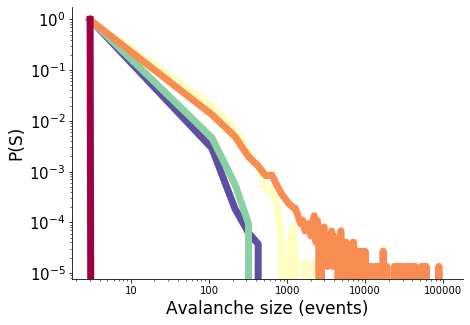

In [6]:
import seaborn as sns
from matplotlib import cm 

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

binchoose = 1000
choose = hom_list
typ = 0
#labels = ['10$^1$','10$^1$','10$^1$','10$^2$','10$^3$']
colors  = cm.Spectral_r(np.linspace(0,1,len(choose)))


#colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
colors  = cm.Spectral_r(np.linspace(0,1,len(choose)))
binvec = []
for i in range(len(choose)):
    binvec = np.append(binvec, np.load(choose[i])[0
                                                 ])
mini = np.min(binvec)
maxi = np.max(binvec)

for i in range(len(choose)):
    avdistcut = np.load(choose[i])[0]
    binned=np.linspace(mini,maxi, binchoose)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 7, markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.ylim(bottom = 0.00001)  
#plt.xlim(right = 1000)  
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#axarr.set_xticklabels(labels, size = 15)
plt.yticks(size = 15)

#plt.savefig(Ffig + 'av_size.svg', transparent = True)
plt.show()

In [16]:
# BLN Avalanche distributions

# Visualise 
#---------------------------------------------------------------------------
av_list = sorted(glob.glob('**_av-*npy*')) 
av_list

['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6d

In [17]:
#Exponent relations

#Calculate empirical exponent relation

for i in range(len(av_list)):
    curr_av = np.load(av_list[i])
    dcc = crfn.DCC(curr_av)
    name = av_list[i][:av_list[i].find('run')+7]
    
    np.save(savepath + name + 'dcc-Tel.npy', dcc)

    print(name)
    print(str(i) + 'of ' + str(len(av_list)))
    

BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_
0of 35
BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_
1of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
2of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_
3of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
4of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_
5of 35
BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
6of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_
7of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_
8of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
9of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_
10of 35
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
11of 35
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_
12of 35
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
13of 35
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_
14of

In [175]:
# Create datalists
#---------------------------------------------------------------------------
blnlist = sorted(glob.glob('*++*PTZ02_*_av.npy*'))
p5list = sorted(glob.glob('*+--*PTZ02_*_av.npy*'))
p20list = sorted(glob.glob('*---*PTZ02_*_av.npy*'))
blnlist, p5list, p20list

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_av.npy'],
 ['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1+--05_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1+--06_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1+--07_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1+--08_2photon_sess-01-6dpf_PTZ02_run-01_av.npy'],
 ['BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1---03_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1---05_2photo

In [157]:
def prac(data):
    avsize = np.load(data)[0]
    avdur = (1/2.73)*np.load(data)[1]
    sizevec, durvec = [],[]
    for e in np.unique(avdur):
        sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == e)]))  
        durvec = np.append(durvec, e)
    return(sizevec,durvec)

In [ ]:
colors2 = ['grey','mediumturquoise','cornflowerblue']


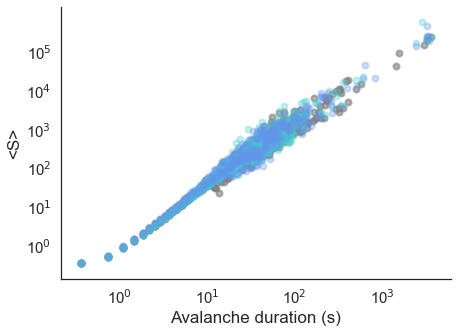

In [178]:
fig, axarr = plt.subplots(figsize = (7,5))
import matplotlib
from matplotlib import cm

labels = ['10$^1$','10$^1$','10$^0$','10$^1$','10$^2$', '10$^3$','10$^4$','10$^5$']

for i in range(len(blnlist)):    
    yaxis, xaxis = prac(blnlist[i])
    axarr.scatter(xaxis, yaxis, linewidth = 2, alpha = 0.6, c = 'grey')
    axarr.set_xscale('log')
    axarr.set_yscale('log')


for i in range(len(blnlist)):    
    yaxis, xaxis = prac(p5list[i])
    axarr.scatter(xaxis, yaxis, linewidth = 2, alpha = 0.3, c = 'mediumturquoise')
    yaxis, xaxis = prac(p20list[i])
    axarr.scatter(xaxis, yaxis, linewidth = 2, alpha = 0.3, c = 'cornflowerblue')

    axarr.set_xscale('log')
    axarr.set_yscale('log')
    

    
    
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xlabel('Avalanche duration (s)', size = '17')
axarr.set_ylabel('<S>', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)

axarr.set_xticklabels(labels, size = 15)
axarr.set_yticklabels(labels, size = 15)
#plt.xlim(right = 800) 
#plt.ylim(top = 300000)  


plt.savefig(Ffig + 'av_sizexdur_foxg1_PTZ.svg', transparent = True)
plt.show()

In [198]:
# BLN Avalanche distributions

# Visualise 
#---------------------------------------------------------------------------
wt_list = sorted(glob.glob('*++*PTZ02_*_dcc-*.npy*')) 
het_list = sorted(glob.glob('*+--*PTZ02_*_dcc-*.npy*')) 
hom_list = sorted(glob.glob('*---*PTZ02_*_dcc-*.npy*')) 

wt_list, het_list, hom_list

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_dcc-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_dcc-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_dcc-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_dcc-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_dcc-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_dcc-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_dcc-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--05_2photon_sess-01-6dpf_PTZ02_run-01_dcc-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--06_2photon_sess-01-6dpf_PTZ02_run-01_dcc-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--07_2photon_sess-01-6dpf_PTZ02_run-01_dcc-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--08_2photon_sess-01-6dpf_PTZ02_run-01_dcc-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--09_2photon_sess-01-6dpf_PTZ02_run-01_dcc-Teltemp.npy'],
 ['BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_PTZ02_run-01_dcc-Tel.npy',
  'BLNLIGHTPTZ-FOXG1---03_2photo

In [199]:
l_list = wt_list, het_list, hom_list
wt, het, hom = [],[],[]
for i in range(len(l_list)):
    print(i)
    for e in range(len(l_list[i])):
        if i == 0:
            wt = np.append(wt, np.load(l_list[i][e]))
        if i == 1:
            het = np.append(het, np.load(l_list[i][e]))
            
        if i == 2:
            hom = np.append(hom, np.load(l_list[i][e]))

0
1
2


In [200]:
point = np.zeros((17))

p_spike_df = {}
count=0
choose = 0

data = [wt, het, hom]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = data[e][i]
        count+=1

p_spike_df = pd.DataFrame({"data":point , "Labels":  np.append(adfn.repeat_list('WT',4),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})



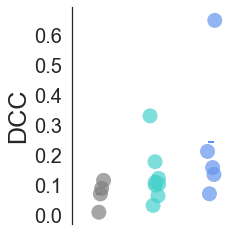

In [201]:

import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (3,4))
ax = sns.pointplot(x="Labels", y="data", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=p_spike_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.7)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('DCC', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
#plt.ylim(top = 2000, bottom = 0)

plt.savefig(Ffig + 'foxg1_dcc_.svg', transparent = True)
plt.show()

In [ ]:
0.07186678387185075 0.02250610904146577
0.1306169832002941 0.03228447581828272
0.245563959041045 0.10332702318659769
U = 9.0   p = 0.1348030522841045
U = 2.0   p = 0.03309628986109672

In [188]:
from scipy import stats
data = wt
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.07186678387185075 0.02250610904146577


In [189]:
from scipy import stats
data = het
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.1306169832002941 0.03228447581828272


In [337]:
from scipy import stats
data = hom
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

1.0612160098242207 0.02166777310251994


In [191]:
#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(wt, het)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(wt, hom)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 9.0   p = 0.1348030522841045
U = 2.0   p = 0.03309628986109672


In [30]:
# Visualise 
#---------------------------------------------------------------------------
av_list = sorted(glob.glob('**_av-*.npy*')) 
pkg_list = sorted(glob.glob('**_pkg-*.npy*')) 
av_list, pkg_list

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2pho

In [31]:
# Branching ratio


#Calculate BR in empirical data

for i in range(len(pkg_list)):
    br = crfn.branch(np.load(pkg_list[i]), np.load(av_list[i]))
    name = av_list[i][:av_list[i].find('run')+7] 
    np.save(savepath + name + '-branch-Tel.npy', br)
    print(name)
    print(str(i) + 'of ' + str(len(av_list)))

BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_
0of 35
BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_
1of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
2of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_
3of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
4of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_
5of 35
BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
6of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_
7of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_
8of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
9of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_
10of 35
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
11of 35
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_
12of 35
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
13of 35
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_
14of

In [225]:
# BLN Avalanche distributions

# Visualise 
#---------------------------------------------------------------------------
wt_list = sorted(glob.glob('*++*BLNLIGHT_*branch-*.npy*')) 
het_list = sorted(glob.glob('*+--*BLNLIGHT_*branch-*.npy*')) 
hom_list = sorted(glob.glob('*---*BLNLIGHT_*branch-*.npy*')) 

wt_list, het_list, hom_list

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--05_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--06_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--07_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--08_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--09_2

In [226]:
l_list = wt_list, het_list, hom_list
wt, het, hom = [],[],[]
for i in range(len(l_list)):
    print(i)
    for e in range(len(l_list[i])):
        if i == 0:
            wt = np.append(wt, np.load(l_list[i][e]))
        if i == 1:
            het = np.append(het, np.load(l_list[i][e]))
            
        if i == 2:
            hom = np.append(hom, np.load(l_list[i][e]))

0
1
2


In [227]:
point = np.zeros((18))

p_spike_df = {}
count=0
choose = 0

data = [wt, het, hom]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = data[e][i]
        count+=1

p_spike_df = pd.DataFrame({"data":point , "Labels":  np.append(adfn.repeat_list('WT',5),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})


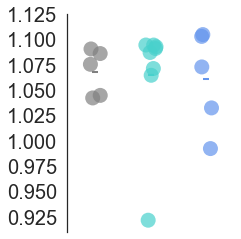

In [229]:


import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (3,4))
ax = sns.pointplot(x="Labels", y="data", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=p_spike_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.7)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.ylim(top = 1.125)

plt.savefig(Ffig + 'foxg1_BR_spont.svg', transparent = True)
plt.show()

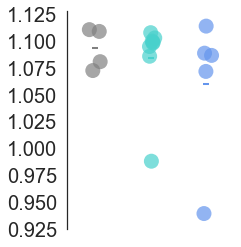

In [223]:


import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (3,4))
ax = sns.pointplot(x="Labels", y="data", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=p_spike_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.7)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
#plt.ylim(top = 2000, bottom = 0)

plt.savefig(Ffig + 'foxg1_BR_ptz.svg', transparent = True)
plt.show()

In [211]:
from scipy import stats
data = wt
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

1.092820115425635 0.009730843508248502


In [212]:
from scipy import stats
data = het
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

1.0841517922215487 0.013980361150380847


In [213]:
from scipy import stats
data = hom
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

1.0596129300089507 0.03096673387055725


In [214]:
#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(wt, het)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(wt, hom)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 14.0   p = 0.3994533348216349
U = 8.0   p = 0.3566515869392288


In [101]:
#Find range to make bin over for correlation function
coord_l = adfn.return_files(Fdata, 'BLNLIGHTPTZ-FOXG1', '*regcoord*')
coord_l

['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOX

In [102]:
from sklearn.metrics.pairwise import euclidean_distances

#Find range to make bin over for correlation function
mini = 0
maxi = 0
dim = [.8, .8, 15]

for c in coord_l:
    coord = np.load(c)
    dist = euclidean_distances(coord)
    curr_max = np.max(dist)
    if maxi < curr_max:
        maxi = curr_max
print(maxi)

671.6972893078173


In [104]:
#Calculate criticality statistics
trace_l = adfn.return_files(Fdata, 'BLNLIGHTPTZ-FOXG1', '*regtrace*')
coord_l = adfn.return_files(Fdata, 'BLNLIGHTPTZ-FOXG1', '*labcoor*')
len(trace_l), len(coord_l)

(35, 35)

In [107]:
for i in range(len(coord_l)):
    sub_trace, sub_dff, sub_bind, sub_coord = tfn.select_region(np.load(trace_l[i]), np.load(trace_l[i]), np.load(trace_l[i]), np.load(coord_l[i]), 'Telencephalon')
    dist = euclidean_distances(sub_coord) 
    corr = np.corrcoef(sub_trace) #Calculate correlation matrix
    corrdis = crfn.corrdist(corr, dist, 200, mini, maxi)
    
    name = coord_l[i][:coord_l[i].find('run')+7] 
    np.save(savepath + name + '-corrdist-Tel.npy', corrdis)
    print(name)
    print(str(i) + 'of ' + str(len(coord_l)))

BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_
0of 35
BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_
1of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
2of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_
3of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
4of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_
5of 35
BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
6of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_
7of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_
8of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
9of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_
10of 35
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
11of 35
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_
12of 35
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
13of 35
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_
14of

In [246]:
# Create lists of trace data
#---------------------------------------------------------------------------
import glob

blnlist = sorted(glob.glob('*++*PTZ02_*corrdist-*'))
p5list = sorted(glob.glob('*+--*PTZ02_*corrdist-*'))
p20list = sorted(glob.glob('*---*PTZ02_*corrdist-*'))

blnlist, p5list, p20list

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--05_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--06_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--07_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--08_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--09_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1---02_2photon_sess

In [ ]:
fig, axarr = plt.subplots(figsize = (7,5))
import matplotlib
from matplotlib import cm

labels = ['10$^1$','10$^1$','10$^0$','10$^1$','10$^2$', '10$^3$','10$^4$','10$^5$']

for i in range(len(blnlist)):    
    yaxis, xaxis = prac(blnlist[i])
    axarr.scatter(xaxis, yaxis, linewidth = 2, alpha = 0.6, c = 'grey')
    axarr.set_xscale('log')
    axarr.set_yscale('log')


for i in range(len(blnlist)):    
    yaxis, xaxis = prac(p5list[i])
    axarr.scatter(xaxis, yaxis, linewidth = 2, alpha = 0.3, c = 'mediumturquoise')
    yaxis, xaxis = prac(p20list[i])
    axarr.scatter(xaxis, yaxis, linewidth = 2, alpha = 0.3, c = 'cornflowerblue')

    axarr.set_xscale('log')
    axarr.set_yscale('log')
    

    
    
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xlabel('Avalanche duration (s)', size = '17')
axarr.set_ylabel('<S>', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)

axarr.set_xticklabels(labels, size = 15)
axarr.set_yticklabels(labels, size = 15)
#plt.xlim(right = 800) 
#plt.ylim(top = 300000)  


plt.savefig(Ffig + 'av_sizexdur_foxg1_PTZ.svg', transparent = True)
plt.show()

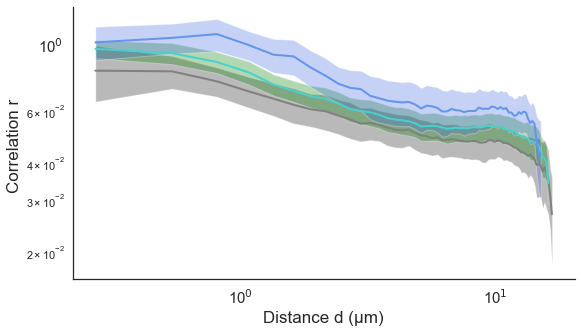

In [247]:
from scipy import stats

labels = ['10$^1$','10$^1$','10$^0$','10$^1$','10$^2$', '10$^3$','10$^4$','10$^5$']

bln_distlist = [np.load(blnlist[i])[0] [:189]  for i in range(len(blnlist))]
p5_distlist = [np.load(p5list[i])[0][:189] for i in range(len(p5list))]
p20_distlist = [np.load(p20list[i])[0][:189] for i in range(len(p20list))]

bln_corrlist = [np.load(blnlist[i])[1][:189] for i in range(len(blnlist))]
p5_corrlist = [np.load(p5list[i])[1][:189] for i in range(len(p5list))]
p20_corrlist = [np.load(p20list[i])[1][:189] for i in range(len(p20list))]

mean_dist = np.mean(np.vstack((p20_distlist,np.vstack((np.vstack(p5_distlist), np.vstack(bln_distlist))))), axis= 0)

listlist = bln_corrlist, p5_corrlist, p20_corrlist
colors = ['grey', 'mediumturquoise','cornflowerblue']
facecolors = ['k', 'green','royalblue']

lines = ['-', '-', '-']
widths = [2, 2, 2]
fig, axarr = plt.subplots(figsize = (9,5))

for i in range(3):
    sem = stats.sem(listlist[i])
    xaxis = mean_dist*0.8
    yaxis = np.mean(listlist[i], axis=0)
    minus = yaxis-(sem)
    plus = yaxis+(sem)

    axarr.fill_between(xaxis[1:len(xaxis)-1], minus[1:len(xaxis)-1], plus[1:len(xaxis)-1],facecolor=facecolors[i],alpha=0.3)
    axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = widths[i], markersize = 1, alpha = 1, color = colors[i], linestyle = lines[i])

    
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_xlabel('Distance d (μm)', size = '17')
axarr.set_ylabel('Correlation r ', size = '17')
axarr.set_xticklabels(labels, size = 15)
axarr.set_yticklabels(labels, size = 15)

axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig(Ffig + 'foxg1_corrdis_ptz_mean.svg', transparent = True)
plt.show()

In [331]:
# Create lists of trace data
#---------------------------------------------------------------------------
import glob

blnlist = sorted(glob.glob('*++*BLNLIGHT_*corrdist-*'))
p5list = sorted(glob.glob('*+--*BLNLIGHT_*corrdist-*'))
p20list = sorted(glob.glob('*---*BLNLIGHT_*corrdist-*'))

blnlist, p5list, p20list

blnslope, p5slope, p20slope = list(range(len(blnlist))), list(range(len(p5list))), list(range(len(p20list)))
blncorr, precorr, p20corr = list(range(len(blnlist))), list(range(len(p5list))), list(range(len(p20list)))

In [287]:
blncorr, blnslope

([0.02558536444406366,
  0.06556213135714174,
  0.041670049309295534,
  0.04685056568189229,
  0.049167130560499386],
 [0.19259154114381347,
  0.37945767221279736,
  0.13685284577556733,
  0.10449183778804097,
  0.1470316673457454])

In [289]:
p5corr, p5slope

([0.047661156527506875,
  0.034076722656446845,
  0.1819239784816767,
  0.04074955615968361,
  0.0273431531164351,
  0.058711549675619715,
  0.06138215501304307,
  0.1304417340250157],
 [0.14443416823741814,
  0.20758059382086005,
  0.42470746522515845,
  0.09431339930211517,
  0.16089574272784488,
  0.12049501647896037,
  0.20206483465264333,
  0.12452024815095908])

In [291]:
p20corr, p20slope

([0.05997029871472348,
  0.052267748826534316,
  0.12970046549801625,
  0.040921631719392476,
  0.04136612001020563],
 [0.19548359412751318,
  0.16348391234685927,
  0.39435595374597704,
  0.14445813495771814,
  0.1588496139550902])

In [335]:
point = np.zeros((18))

p_spike_df = {}
count=0
choose = 0

data = [blncorr, p5corr, p20corr]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = data[e][i]
        count+=1

p_spike_df = pd.DataFrame({"data":point , "Labels":  np.append(adfn.repeat_list('WT',5),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})


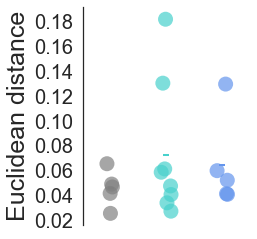

In [336]:


import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (3,4))
ax = sns.pointplot(x="Labels", y="data", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=p_spike_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.7)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Euclidean distance', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
#plt.ylim(top = 2000, bottom = 0)

plt.savefig(Ffig + 'foxg1_corrdist_spont.svg', transparent = True)
plt.show()

In [314]:

blnslope, p5slope, p20slope = list(range(len(blnlist))), list(range(len(p5list))), list(range(len(p20list)))
blncorr, precorr, p20corr = list(range(len(blnlist))), list(range(len(p5list))), list(range(len(p20list)))

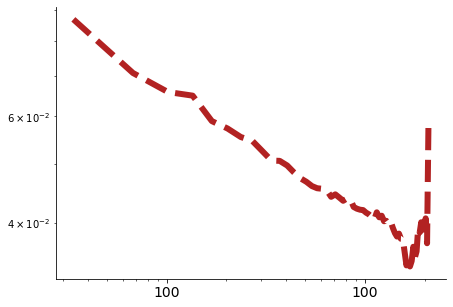

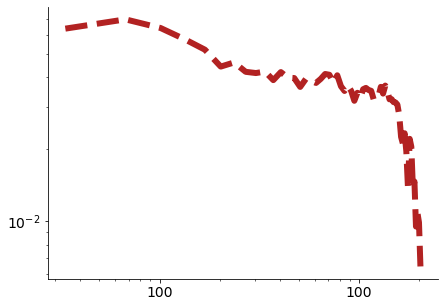

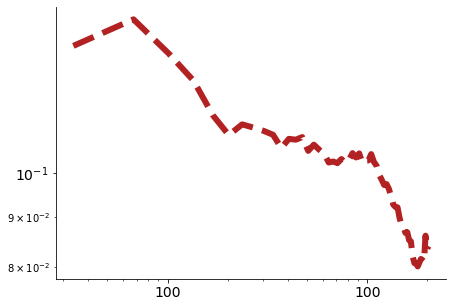

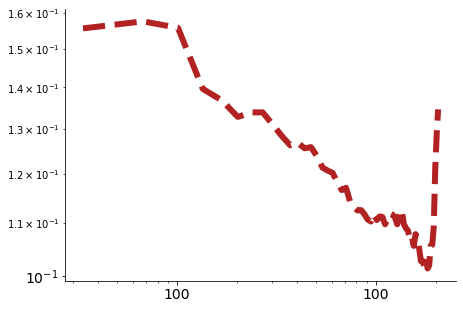

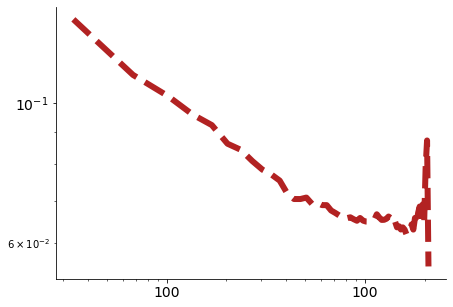

In [334]:
import seaborn as sns

import matplotlib
import powerlaw
sns.reset_orig()
num1 = adfn.name_zero('front',2,12,1)

colors = ['black', 'darkorange','firebrick']
lines = ['-', '--', '--']
widths = [4, 6, 6]



count=0

llist = blnlist
for i in range(len(blnlist)):

        fig, axarr = plt.subplots(figsize = (7,5))
        data = np.load(llist[i])
        xaxis = data[0]
        yaxis = data[1]
        axarr.plot(xaxis[1:np.where(np.isnan(yaxis[1:]) == True) [0][0]], yaxis[1:np.where(np.isnan(yaxis[1:]) == True) [0][0]], '-', linewidth = widths[e], markersize = 1, alpha = 1, color = colors[e], linestyle = lines[e])
        blnslope[i] = -1*stats.linregress(np.log10(xaxis[1:np.where(np.isnan(yaxis[1:]) == True) [0][0]]), np.log10(yaxis[1:np.where(np.isnan(yaxis[1:]) == True) [0][0]]))[0]
        m,c = np.polyfit(np.log10(xaxis[1:np.where(np.isnan(yaxis[1:]) == True) [0][0]]), np.log10(yaxis[1:np.where(np.isnan(yaxis[1:]) == True) [0][0]]), 1)
        y_fit = 10**(m*(np.log10(xaxis[1:np.where(np.isnan(yaxis[1:]) == True) [0][0]])) + c) # calculate the fitted values of y 
        blncorr[i] = np.linalg.norm(yaxis[1:np.where(np.isnan(yaxis[1:]) == True) [0][0]]-y_fit) #stats.pearsonr(yaxis[1:], y_fit)[0]
        #axarr.plot(xaxis[1:len(xaxis)-1], y_fit[1:len(xaxis)-1], '-', linewidth = 1, markersize = 1, alpha = 1, color ='k', linestyle = '-')

        
        
        count+=1
        axarr.set_xscale('log')
        axarr.set_yscale('log')
        #axarr.set_xlabel('Distance d (μm)', size = '13')
        #axarr.set_ylabel('Correlation c ', size = '13')

        axarr.set_xticklabels(['100', '100', '100', '100'])
        axarr.spines['top'].set_visible(False)
        axarr.spines['right'].set_visible(False)
        plt.yticks(fontsize = 14)
        plt.xticks(fontsize = 14)

        #plt.savefig(Ffig + 'corrdist_sz' + str(count) + '.svg', transparent = True)
        plt.show()